In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('stringed_survey.csv')

In [3]:
categorical_columns = ['Age', 'Gender', 'Category', 'MarriageStatus','FreeCustomization',
                       'WTSCustomization', 'WantOwnPersonalization', 'WTSPersonalization',
                        'PersonalizationJob']

value_dict = {'Age': ['20-30', '31-40', '41-50', '51-60'],
 'Gender': ['Male', 'Female'],
 'Category': [
      'Do not own a car, but planning to purchase in future',
      'Own a car',
      'Own more than one car'],
 'MarriageStatus': [
      'Single',
      'Married with children',
      'Married with no children'],
 'FreeCustomization': ['Not likely', 'Likely', 'Very likely'],
 'WTSCustomization': ['0', 'under 500', '500-1000', 'over 1000'],
 'WantOwnPersonalization': ['No', 'Only with professional help', 'Yes'],
 'WTSPersonalization': ['0', 'under 500', '500-1000', 'over 1000'],
 'PersonalizationJob': [
      np.nan,
      'No, I would need a designer to model my sketch',
      'Yes, I can design on my own']}

In [4]:
freq_dict = {}
for column in categorical_columns:
    temp = data[column].to_numpy()
    value_list = value_dict[column]
    freq_list = [0] * len(value_list)
    for i in range(len(temp)):
        current_index = value_list.index(temp[i])
        temp[i] = current_index
        freq_list[current_index] += 1
    data[column] = temp
    value_dict[column] = value_list
    freq_dict[column] = freq_list

In [5]:
data

,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob,factors,external,internal,fact_length,ext_length,int_length
0,0,0,0,0,Price;Technological features;Functionality,2,Wheels;Grilles,Steering wheel;Dashboard,2,0,2,0,"['Price', 'Technological features', 'Functiona...","['Wheels', 'Grilles']","['Steering wheel', 'Dashboard']",3.0,2.0,2
1,3,1,1,1,Price;Brand name;Functionality,2,Grilles,Centre compartment;Dashboard;Sun blocker for f...,1,1,3,0,"['Price', 'Brand name', 'Functionality']",['Grilles'],"['Centre compartment', 'Dashboard', 'Sun block...",3.0,1.0,3
2,0,0,1,0,Price;Brand name;Aesthetics;Functionality;Size,2,NaN,Steering wheel;Centre compartment;Door handles...,0,1,0,0,"['Price', 'Brand name', 'Aesthetics', 'Functio...",NaN,"['Steering wheel', 'Centre compartment', 'Door...",5.0,NaN,4
3,0,0,1,0,Price;Brand name;Aesthetics;Technological feat...,2,NaN,Steering wheel;Centre compartment;Dashboard,1,0,1,0,"['Price', 'Brand name', 'Aesthetics', 'Technol...",NaN,"['Steering wheel', 'Centre compartment', 'Dash...",7.0,NaN,3
4,0,1,0,0,Price;Aesthetics;Technological features;Functi...,1,Wheels,Centre compartment;Dashboard,1,1,2,0,"['Price', 'Aesthetics', 'Technological feature...",['Wheels'],"['Centre compartment', 'Dashboard']",4.0,1.0,2
5,0,1,0,0,Price;Brand name;Aesthetics;Functionality,2,Wheels;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,1,2,1,0,"['Price', 'Brand name', 'Aesthetics', 'Functio...","['Wheels', 'Side mirrors', 'Bumpers']","['Steering wheel', 'Centre compartment', 'Door...",4.0,3.0,4
6,0,1,0,0,Price;Brand name;Aesthetics;Technological feat...,2,Side mirrors;Bumpers,Door handles;Dashboard,1,1,1,0,"['Price', 'Brand name', 'Aesthetics', 'Technol...","['Side mirrors', 'Bumpers']","['Door handles', 'Dashboard']",8.0,2.0,2
7,0,0,0,0,Price;Functionality;Size;Sustainability/enviro...,2,Wheels;Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,1,1,3,0,"['Price', 'Functionality', 'Size', 'Sustainabi...","['Wheels', 'Headlights', 'Side mirrors', 'Bump...","['Centre compartment', 'Door handles', 'Dashbo...",4.0,4.0,3
8,1,0,2,1,Price,0,Bumpers,Dashboard,0,0,3,0,['Price'],['Bumpers'],['Dashboard'],1.0,1.0,1
9,3,0,1,1,Price;Brand name;Technological features;Functi...,2,Grilles;Bumpers,Steering wheel;Centre compartment;Dashboard,1,1,1,0,"['Price', 'Brand name', 'Technological feature...","['Grilles', 'Bumpers']","['Steering wheel', 'Centre compartment', 'Dash...",6.0,2.0,3


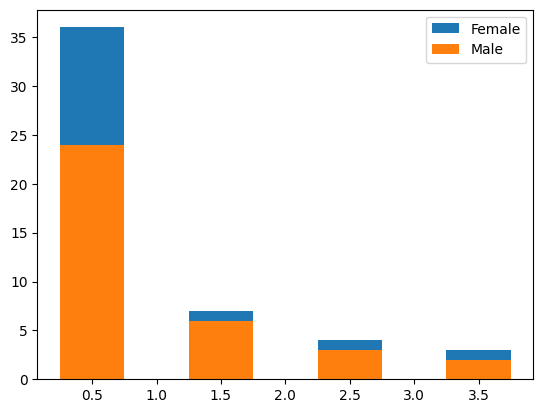

In [63]:
fig, ax = plt.subplots(1,1)
ax.hist(data['Age'], bins= 4, range=(0,4), rwidth = 0.5, label="Female")
ax.hist(data['Age'][data['Gender'] == 0], bins= 4, range=(0,4), rwidth = 0.5, label="Male")
ax.legend()

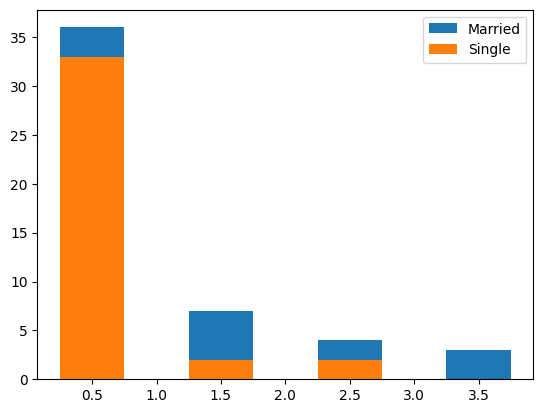

In [65]:
fig, ax = plt.subplots(1,1)
ax.hist(data['Age'], bins= 4, range=(0,4), rwidth = 0.5, label="Married")
ax.hist(data['Age'][data['MarriageStatus'] == 0], bins= 4, range=(0,4), rwidth = 0.5, label="Single")
ax.legend()

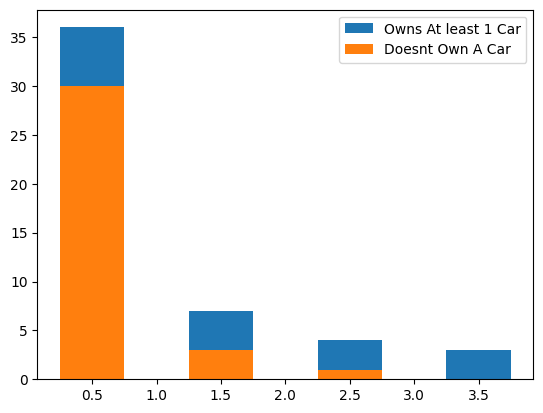

In [68]:
fig, ax = plt.subplots(1,1)
ax.hist(data['Age'], bins= 4, range=(0,4), rwidth = 0.5, label="Owns At least 1 Car")
ax.hist(data['Age'][data['Category'] == 0], bins= 4, range=(0,4), rwidth = 0.5, label="Doesnt Own A Car")
ax.legend()

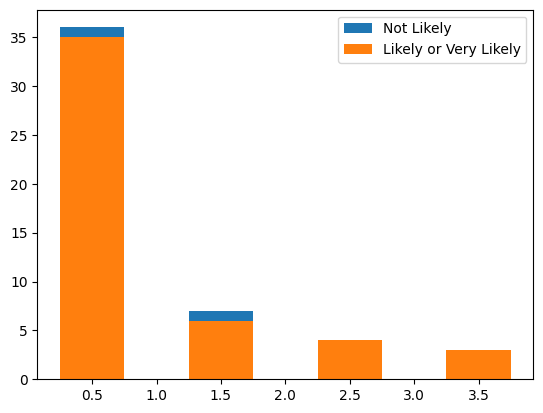

In [75]:
fig, ax = plt.subplots(1,1)
ax.hist(data['Age'], bins= 4, range=(0,4), rwidth = 0.5, label="Not Likely")
ax.hist(data['Age'][data['FreeCustomization'] > 0], bins= 4, range=(0,4), rwidth = 0.5, label="Likely or Very Likely")
ax.legend()

# Select Demography of Interest

In [90]:
doi = np.logical_and(data['Age'] < 2, data['Gender'] == 0)
data['doi'] = doi

Text(0.5, 1.0, 'Age Demography')

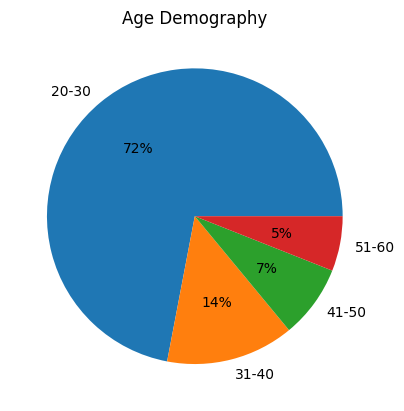

In [55]:
fig, ax = plt.subplots(1,1)
ax.pie(freq_dict['Age'], labels=value_dict['Age'], autopct='%1d%%')
ax.set_title('Age Demography')

Text(0.5, 1.0, 'Market Share')

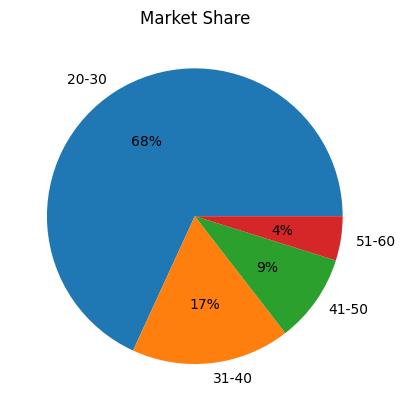

In [39]:
market_share = [0] * len(value_dict['Age'])
mean_price = [0, 250, 750, 1250]
for i in range(len(data['WTSCustomization'].to_numpy())):
    market_share[data['Age'].to_numpy()[i]] += mean_price[data['WTSCustomization'].to_numpy()[i]]
for i in range(len(data['WTSPersonalization'].to_numpy())):
    market_share[data['Age'].to_numpy()[i]] += mean_price[data['WTSPersonalization'].to_numpy()[i]]
    
fig, ax = plt.subplots(1,1)
ax.pie(market_share, labels=value_dict['Age'], autopct='%1d%%')
ax.set_title('Market Share')

Text(0.5, 0.98, 'Effect of Age on Willingness to Spend on Personalization')

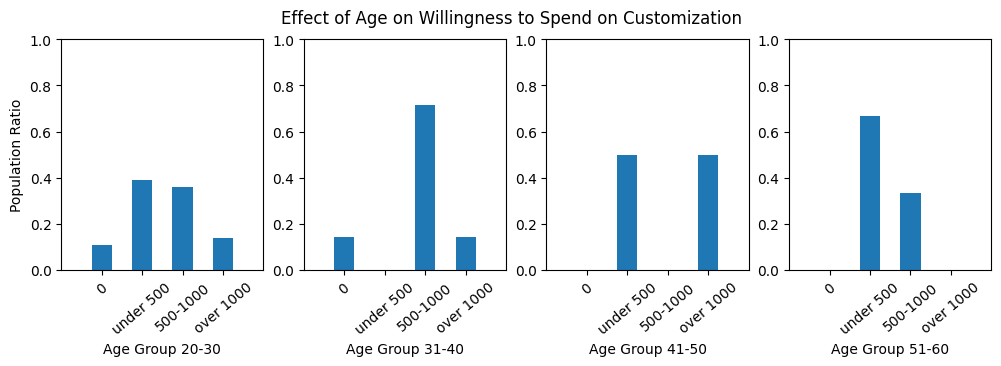

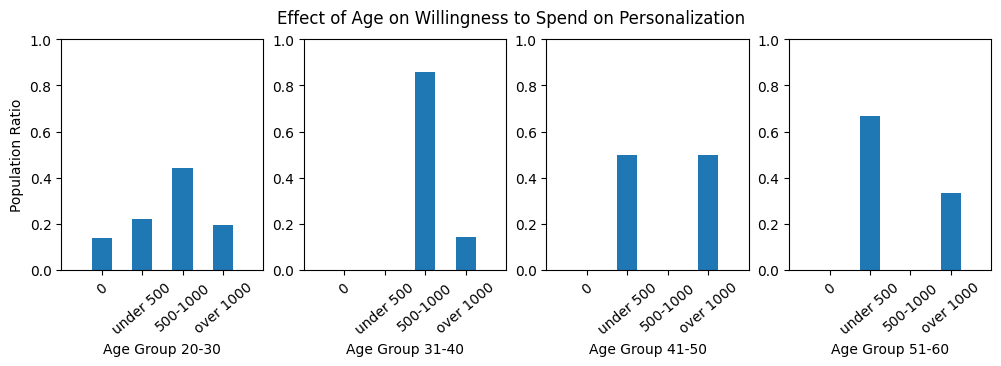

In [206]:
a = [data['WTSCustomization'][data['Age'] == i].to_numpy() for i in range(len(value_dict['Age']))]
fig, ax = plt.subplots(1,4, figsize=(12,3))
for i in range(0,4):
    ax[i].hist(a[i], density=True, bins= 4, range=(0,4), rwidth = 0.5)
    ax[i].set_xlim(-0.5,4.5)
    ax[i].set_ylim(0,1)
    ax[i].set_xticks([0.5,1.5,2.5,3.5], value_dict['WTSCustomization'], rotation = 40)
    ax[i].set_xlabel(f'Age Group {value_dict["Age"][i]}')
ax[0].set_ylabel('Population Ratio')
fig.suptitle("Effect of Age on Willingness to Spend on Customization")
a = [data['WTSPersonalization'][data['Age'] == i].to_numpy() for i in range(len(value_dict['Age']))]
fig, ax = plt.subplots(1,4, figsize=(12,3))
for i in range(0,4):
    ax[i].hist(a[i], density=True, bins= 4, range=(0,4), rwidth = 0.5)
    ax[i].set_xlim(-0.5,4.5)
    ax[i].set_ylim(0,1)
    ax[i].set_xticks([0.5,1.5,2.5,3.5], value_dict['WTSCustomization'], rotation = 40)
    ax[i].set_xlabel(f'Age Group {value_dict["Age"][i]}')
ax[0].set_ylabel('Population Ratio')
fig.suptitle("Effect of Age on Willingness to Spend on Personalization")

In [217]:
data[['WTSCustomization', 'WTSPersonalization']].astype('int8').corr()

,WTSCustomization,WTSPersonalization
WTSCustomization,1.00000,0.57552
WTSPersonalization,0.57552,1.00000


# Factors Analyis

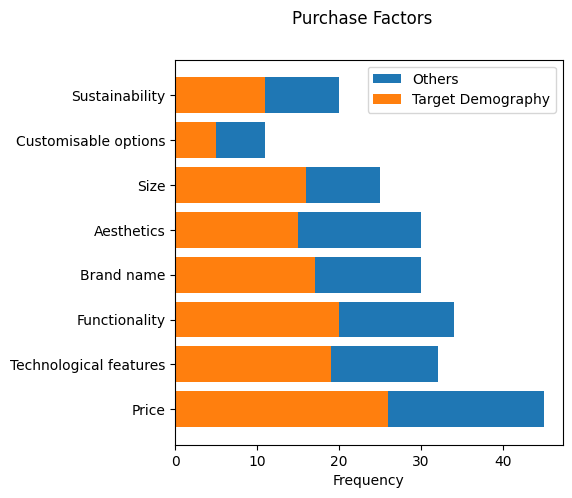

In [120]:
factor_dict = {}
for factors in data['FactorsPurchase']:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in factor_dict.keys():
                factor_dict[factor] += 1
            else:
                factor_dict[factor] = 1

doi_factor_dict = {}
for factors in data['FactorsPurchase'][data['doi']]:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in doi_factor_dict.keys():
                doi_factor_dict[factor] += 1
            else:
                doi_factor_dict[factor] = 1

factor_dict['Sustainability'] = factor_dict['Sustainability/environment considerations']
doi_factor_dict['Sustainability'] = doi_factor_dict['Sustainability/environment considerations']
del factor_dict['Sustainability/environment considerations'], doi_factor_dict['Sustainability/environment considerations']

hist_temp = [factor_dict[i] for i in factor_dict.keys()]
doi_hist_temp = [doi_factor_dict[i] for i in doi_factor_dict.keys()]
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(list(range(len(hist_temp))), hist_temp, label='Others')
ax.barh(list(range(len(doi_hist_temp))), doi_hist_temp, label='Target Demography')
 
ax.set_yticks(list(range(len(hist_temp))), factor_dict.keys(), rotation = 0, fontsize=10)
ax.set_xlabel(f'Frequency')
fig.suptitle('Purchase Factors')
ax.legend()

Text(0.5, 1.0, 'Interior Component Factors')

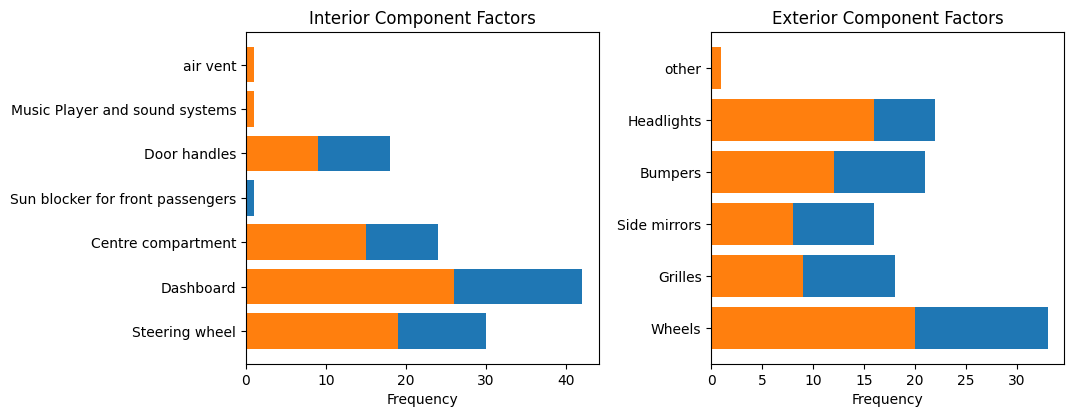

In [115]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.tight_layout(pad=5.0)
# Exterior
ext_dict = {}
for factors in data['ExteriorComponents']:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in ext_dict.keys():
                ext_dict[factor] += 1
            else:
                ext_dict[factor] = 1

doi_ext_dict = {i: 0 for i in ext_dict.keys()}
for factors in data['ExteriorComponents'][data['doi']]:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in doi_ext_dict.keys():
                doi_ext_dict[factor] += 1
            else:
                doi_ext_dict[factor] = 1

# Remove Anomaly

ext_dict['other'] = ext_dict['add body kit and change the exhaust and tune the engine']
doi_ext_dict['other'] = doi_ext_dict['add body kit and change the exhaust and tune the engine']
del ext_dict['add body kit and change the exhaust and tune the engine'], doi_ext_dict['add body kit and change the exhaust and tune the engine']

hist_temp = [ext_dict[i] for i in ext_dict.keys()]
doi_hist_temp = [doi_ext_dict[i] for i in doi_ext_dict.keys()]
ax[1].barh(list(range(len(hist_temp))), hist_temp)
ax[1].barh(list(range(len(doi_hist_temp))), doi_hist_temp)

ax[1].set_yticks(list(range(len(hist_temp))), ext_dict.keys(), rotation = 0, fontsize=10)
ax[1].set_xlabel(f'Frequency')
ax[1].set_title('Exterior Component Factors')

# Interior
int_dict = {}
for factors in data['InteriorComponents']:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in int_dict.keys():
                int_dict[factor] += 1
            else:
                int_dict[factor] = 1
                
doi_int_dict = {i: 0 for i in int_dict.keys()}
for factors in data['InteriorComponents'][data['doi']]:
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in doi_int_dict.keys():
                doi_int_dict[factor] += 1
            else:
                doi_int_dict[factor] = 1

hist_temp = [int_dict[i] for i in int_dict.keys()]
doi_hist_temp = [doi_int_dict[i] for i in doi_int_dict.keys()]
ax[0].barh(list(range(len(hist_temp))), hist_temp)
ax[0].barh(list(range(len(doi_hist_temp))), doi_hist_temp)

ax[0].set_yticks(list(range(len(hist_temp))), int_dict.keys(), rotation = 0, fontsize=10)
ax[0].set_xlabel(f'Frequency')
ax[0].set_title('Interior Component Factors')

In [180]:
temp = np.zeros((len(data), len(factor_dict.keys()))).astype('int')
for i in range(len(data['FactorsPurchase'])):
    factors = data['FactorsPurchase'][i]
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in list(factor_dict.keys()):
                temp[i, list(factor_dict.keys()).index(factor)] = 1
purchase_factor_df = pd.DataFrame(temp, columns=list(factor_dict.keys())).astype('category')

temp = np.zeros((len(data), len(ext_dict.keys()))).astype('int')
for i in range(len(data['ExteriorComponents'])):
    factors = data['ExteriorComponents'][i]
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in list(ext_dict.keys()):
                temp[i, list(ext_dict.keys()).index(factor)] = 1
ext_factor_df = pd.DataFrame(temp, columns=list(ext_dict.keys())).astype('category')

temp = np.zeros((len(data), len(int_dict.keys()))).astype('int')
for i in range(len(data['InteriorComponents'])):
    factors = data['InteriorComponents'][i]
    if factors is not np.nan:
        for factor in factors.split(';'):
            if factor in list(int_dict.keys()):
                temp[i, list(int_dict.keys()).index(factor)] = 1
int_factor_df = pd.DataFrame(temp, columns=list(int_dict.keys())).astype('category')

In [221]:
filtered_data = data[['Age', 'Gender', 'Category', 'MarriageStatus','FreeCustomization',
                      'WantOwnPersonalization','PersonalizationJob']]\
                .join(purchase_factor_df).join(int_factor_df)\
                .join(ext_factor_df)\
                .join(data[['WTSCustomization', 'WTSPersonalization']])\
                .astype('category')

In [225]:
filtered_data.keys()

Index(['Age', 'Gender', 'Category', 'MarriageStatus', 'FreeCustomization',
       'WantOwnPersonalization', 'PersonalizationJob', 'Price',
       'Technological features', 'Functionality', 'Brand name', 'Aesthetics',
       'Size', 'Customisable options', 'Sustainability', 'Steering wheel',
       'Dashboard', 'Centre compartment', 'Sun blocker for front passengers',
       'Door handles', 'Music Player and sound systems', 'air vent', 'Wheels',
       'Grilles', 'Side mirrors', 'Bumpers', 'Headlights', 'other',
       'WTSCustomization', 'WTSPersonalization'],
      dtype='object')